<a href="https://colab.research.google.com/github/pratixa5548/using-decision-tree-to-predict-diabetes-readmission-probability/blob/main/fdsreadmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['diabetic_data.csv']))
print(df)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [ ]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [ ]:
df = df.drop(['citoglipton', 'examide','acetohexamide','glimepiride-pioglitazone','metformin-rosiglitazone'], axis = 1)

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


In [ ]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

<ipython-input-53-f2f54d259688>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
<ipython-input-53-f2f54d259688>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
<ipython-input-53-f2f54d259688>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [ ]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

<ipython-input-54-a93b7ed3ed2c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
<ipython-input-54-a93b7ed3ed2c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)


In [ ]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

<ipython-input-55-4694c4241c95>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)


,count
age,
8,24815
7,21521
6,16546
9,16223
5,9208
4,3538
10,2594
3,1471
2,466


In [ ]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [ ]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [ ]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<ipython-input-59-69ebdb50a4a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


In [ ]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [ ]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [ ]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [ ]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [ ]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [ ]:
print(df['readmitted'].unique())


[0 1]


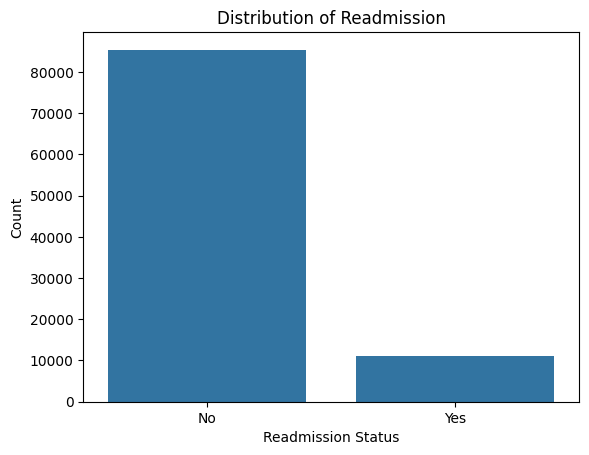

In [ ]:

# Ensure the column is categorical for better plotting
df['readmitted'] = df['readmitted'].astype('category')

# Create the countplot
sns.countplot(x='readmitted', data=df).set_title('Distribution of Readmission')

# Add labels and improve visualization
plt.xticks([0, 1], ['No', 'Yes'])  # Rename x-axis labels
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()


<ipython-input-66-13feb082618e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-66-13feb082618e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

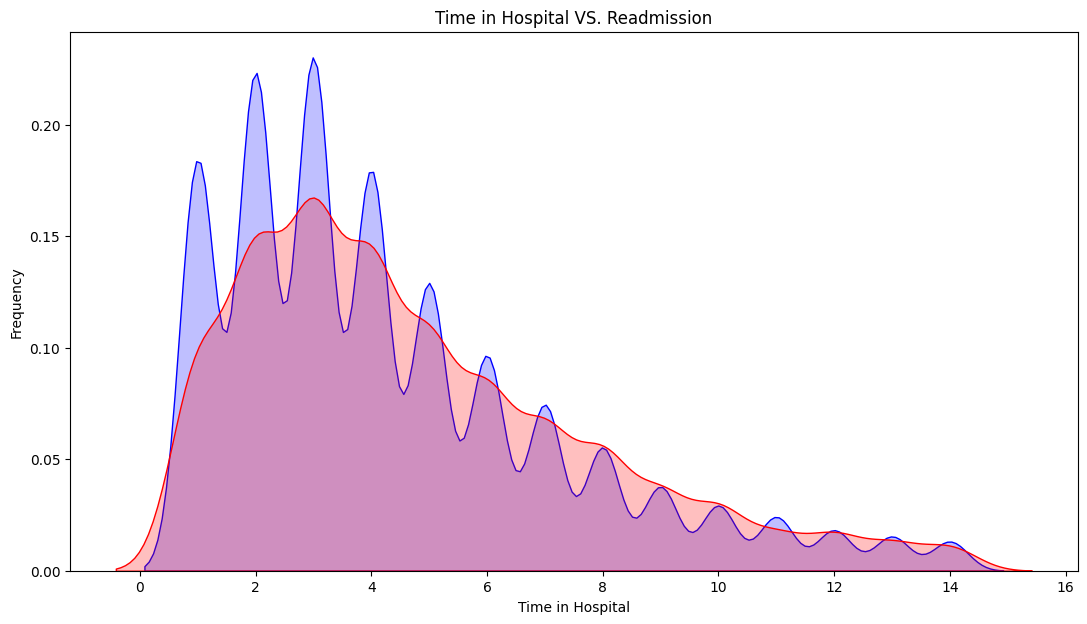

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

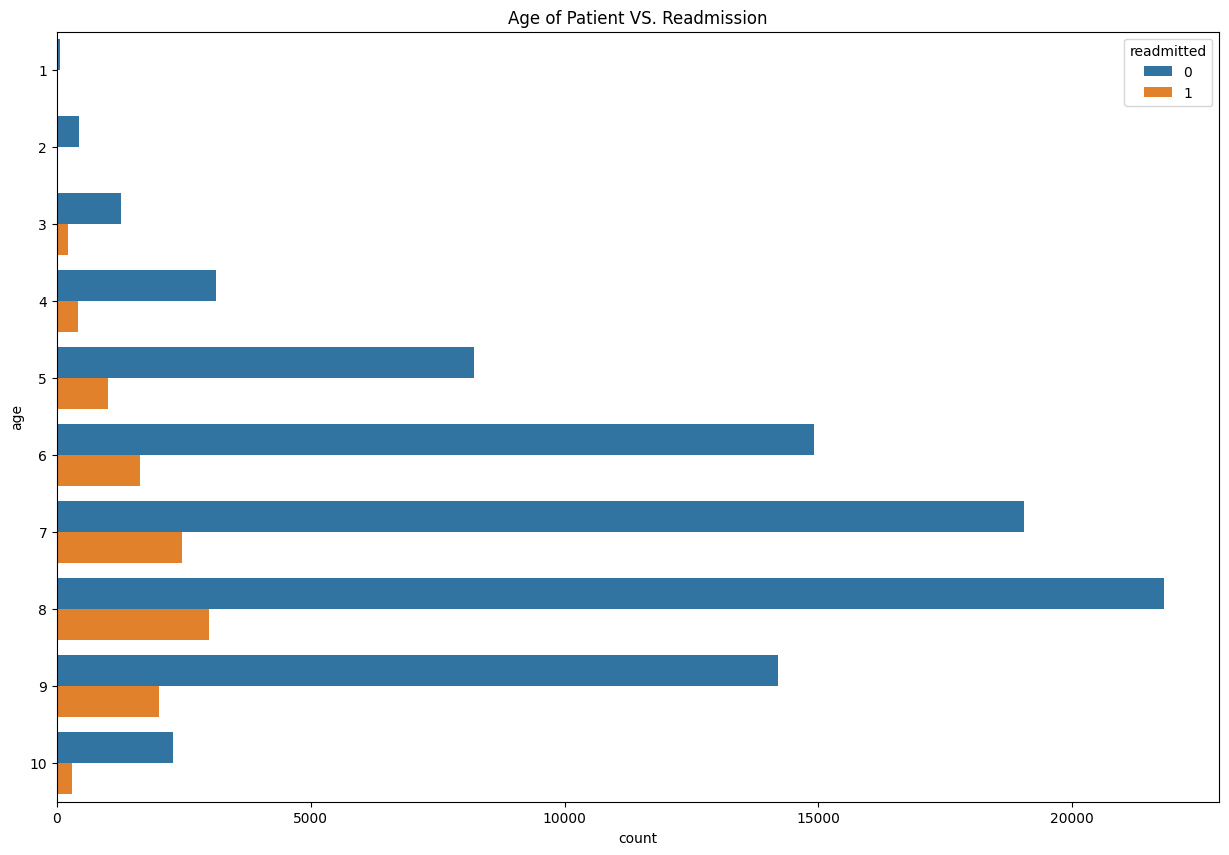

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

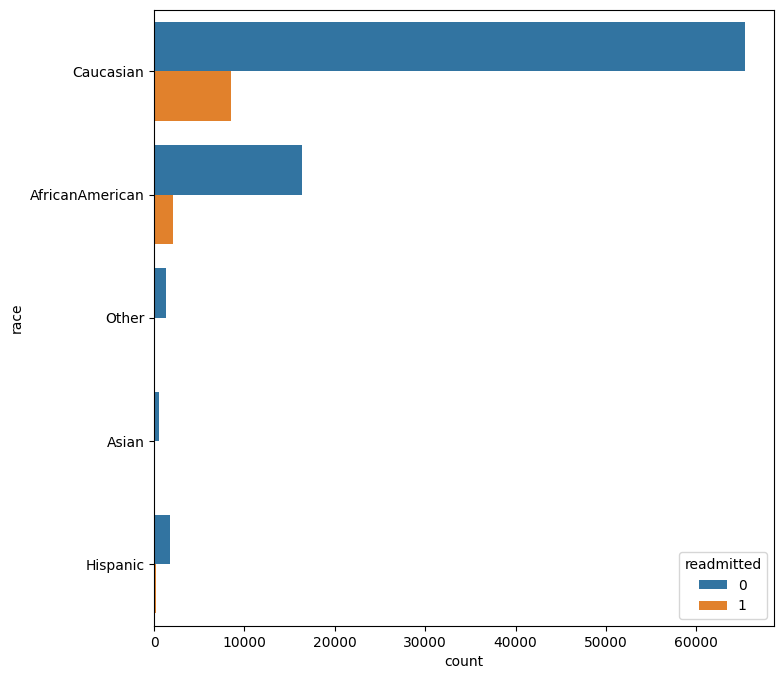

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

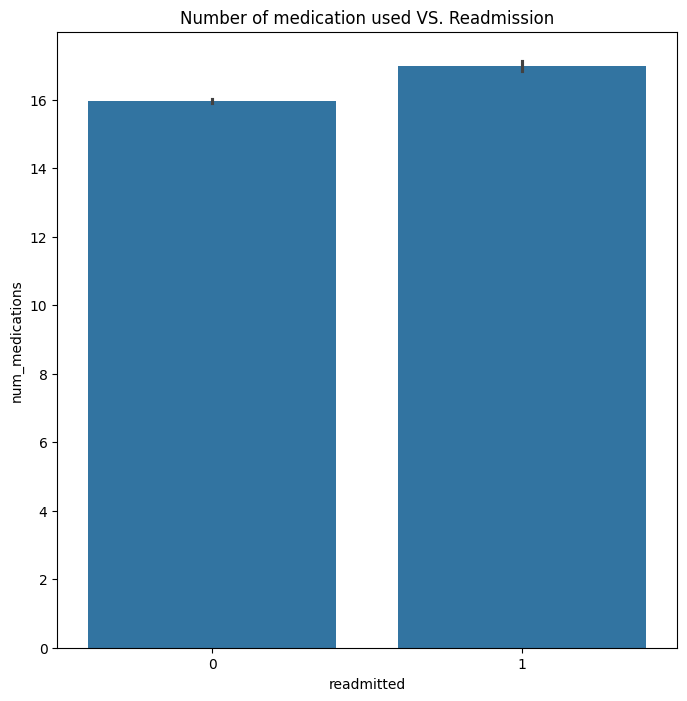

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

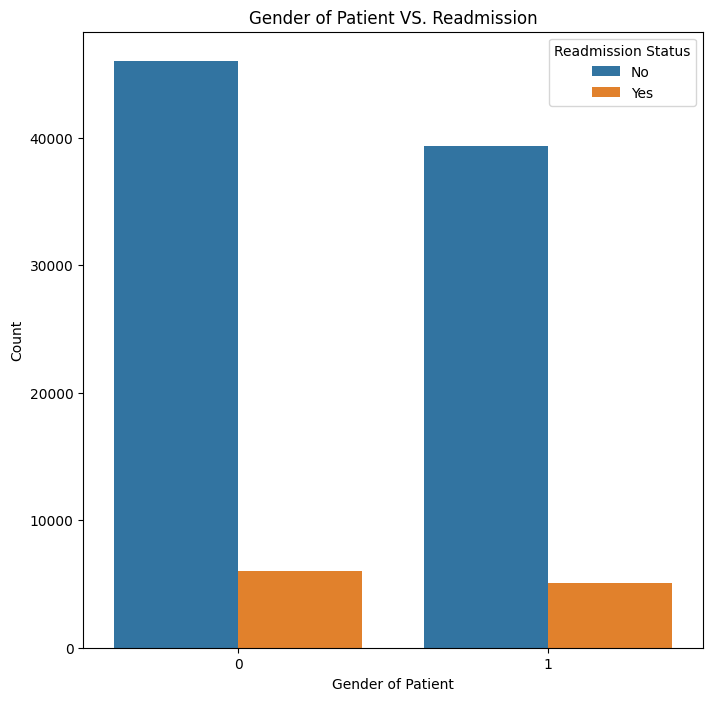

In [ ]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='gender', hue='readmitted', data=df).set_title("Gender of Patient VS. Readmission")

# Improve plot aesthetics
plt.xlabel('Gender of Patient')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['No', 'Yes'])
plt.show()


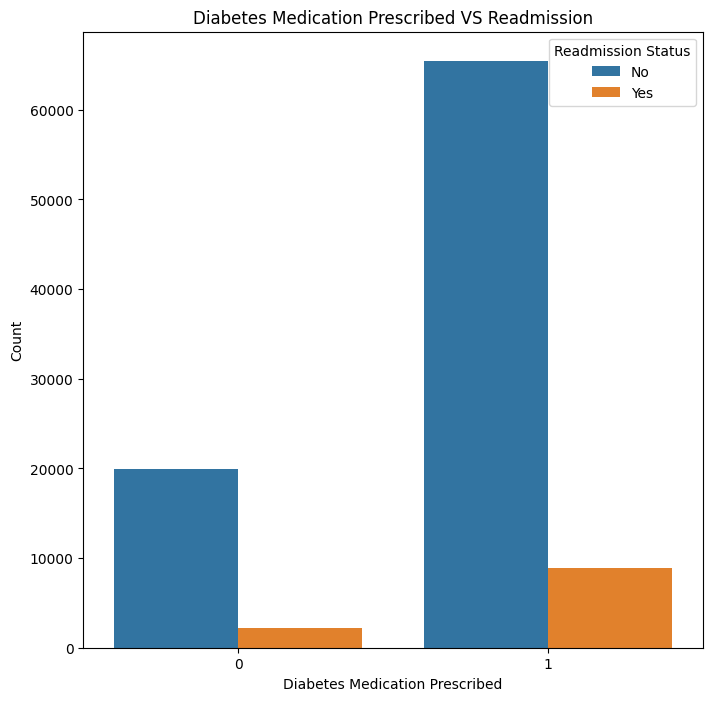

In [ ]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(x='diabetesMed', hue='readmitted', data=df).set_title('Diabetes Medication Prescribed VS Readmission')

# Improve plot aesthetics
plt.xlabel('Diabetes Medication Prescribed')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['No', 'Yes'])
plt.show()


Text(0.5, 1.0, 'Service Utilization VS. Readmission')

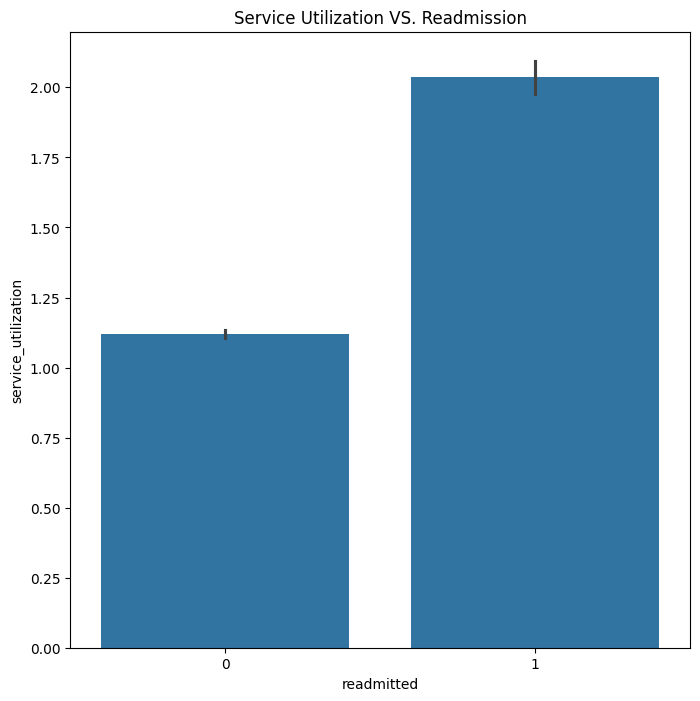

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

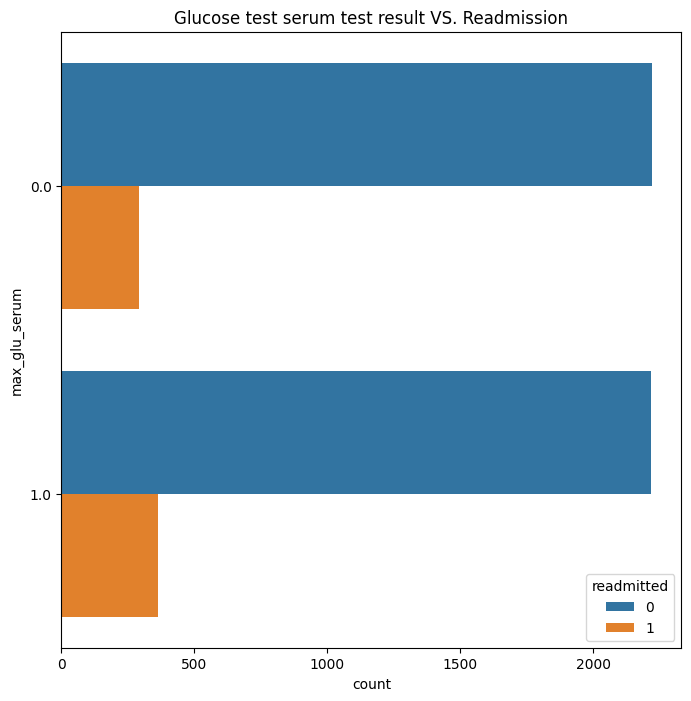

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

Text(0.5, 1.0, 'A1C test result VS. Readmission')

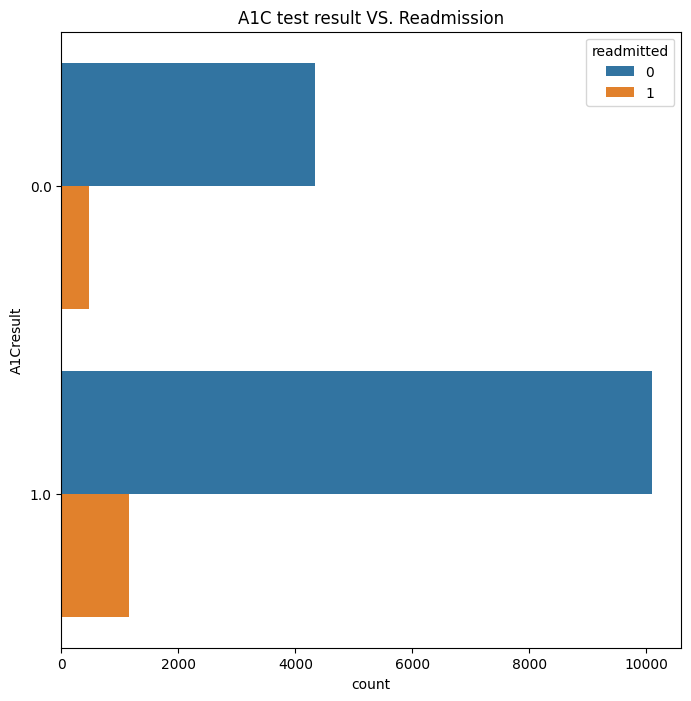

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

<ipython-input-75-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-75-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

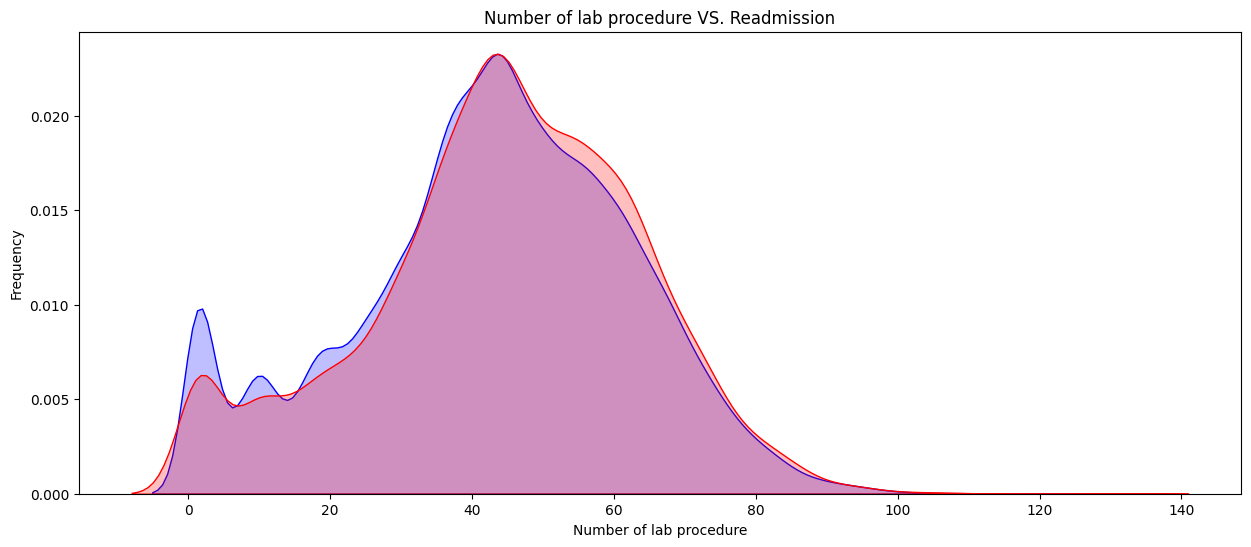

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [ ]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [ ]:
# List of nominal features
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id',
     'admission_source_id', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
     'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
     'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
     'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
     'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'age',
     'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3',
     'level2_diag1', 'level2_diag2', 'level2_diag3']

# Check for missing columns
missing_cols = [col for col in i if col not in df.columns]
print("Missing columns:", missing_cols)

# Remove missing columns
i = [col for col in i if col in df.columns]

# Check for duplicate columns in 'i'
duplicate_cols = [col for col in i if i.count(col) > 1]
print("Duplicate columns:", duplicate_cols)

# Remove duplicates
i = list(set(i))

# Convert data types one by one
for col in i:
    if col in df.columns:
        try:
            df[col] = df[col].astype('object')
        except Exception as e:
            print(f"Error converting column {col}: {e}")

# Check the DataFrame shape
print(df.shape)


Missing columns: ['acetohexamide', 'glimepiride-pioglitazone', 'metformin-rosiglitazone']
Duplicate columns: ['A1Cresult', 'A1Cresult']
(96446, 50)


In [ ]:
df.dtypes

,0
encounter_id,object
patient_nbr,object
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


In [ ]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

,count
nummed,
1,44591
0,22156
2,20899
3,7448
4,1290
5,57
6,5


In [ ]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_diagnoses',
 'numchange',
 'num_procedures',
 'num_medications',
 'number_emergency',
 'service_utilization',
 'time_in_hospital',
 'num_lab_procedures',
 'number_outpatient',
 'number_inpatient']

In [ ]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [ ]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
1,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
2,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
3,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
4,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
5,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656
6,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
7,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
8,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
9,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389


In [ ]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [ ]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [ ]:
df.shape

(96446, 51)

In [ ]:
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['number_emergency_log1p',
 'numchange',
 'num_procedures',
 'num_medications',
 'number_outpatient_log1p',
 'number_inpatient_log1p',
 'time_in_hospital',
 'num_lab_procedures',
 'service_utilization_log1p',
 'number_diagnoses']

In [ ]:
# List of nominal features
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
     'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
     'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone', 'A1Cresult']

# Fill NaN values with 0 and then convert to 'int64'
df[i] = df[i].fillna(0).astype('int64')

# Check the data types of the columns
print(df.dtypes)

# Optional: Check for any remaining NaN values
print(df[i].isnull().sum())


encounter_id                   object
patient_nbr                    object
race                           object
gender                         object
age                            object
admission_type_id              object
discharge_disposition_id       object
admission_source_id            object
time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
diag_1                         object
diag_2                         object
diag_3                         object
number_diagnoses                int64
max_glu_serum                  object
A1Cresult                       int64
metformin                       int64
repaglinide                     int64
nateglinide                     int64
chlorpropamide                  int64
glimepiride                     int64
glipizide                       int64
glyburide                       int64
tolbutamide                     int64
pioglitazone

<ipython-input-88-a967f2589ba3>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(0).astype('int64')


In [ ]:
dfcopy = df.copy(deep = True)

In [ ]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [ ]:

df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [ ]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [ ]:

for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [ ]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [ ]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [ ]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 52)

In [ ]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [ ]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

<ipython-input-98-d878bd60c0ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerics] = standardize(df2[numerics])


In [ ]:
from sklearn.preprocessing import LabelEncoder
from matplotlib import cm

# Encode categorical column (replace 'gender' with your column name)
le = LabelEncoder()
df2['gender_encoded'] = le.fit_transform(df2['gender'])

# Calculate correlation for numeric columns
numeric_columns = df2.select_dtypes(include=['number']).columns
table = df2[numeric_columns].corr(method='pearson')

# Define a colormap
my_cmap = 'coolwarm'

# Apply colormap style to correlation table
styled_table = table.style.background_gradient(cmap=my_cmap, axis=0)

# Display the styled table (if in Jupyter Notebook)
styled_table


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,numchange,number_emergency_log1p,service_utilization_log1p,number_outpatient_log1p,number_inpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,number_diagnoses|time_in_hospital,num_medications|numchange,gender_encoded
time_in_hospital,1.000000,0.320135,0.144392,0.441167,0.224011,0.052042,-0.012421,0.031130,0.006653,0.001164,0.008496,0.013698,0.024610,0.005062,-0.004376,-0.000813,0.000816,-0.002206,0.005697,-0.006658,0.097371,-0.000302,0.002334,0.002794,0.139670,-0.001829,0.006862,-0.027614,0.051496,0.859364,0.270542,0.853015,0.502133,0.456259,0.938944,0.229845,-0.029737
num_lab_procedures,0.320135,1.000000,0.013923,0.230888,0.138471,0.223610,-0.050781,0.004737,-0.007755,-0.002344,-0.009528,0.016552,0.002659,0.000595,-0.017770,-0.008809,-0.001930,-0.003635,0.005200,-0.001007,0.100137,-0.014247,-0.003791,-0.003981,0.111876,0.006784,-0.001783,-0.041207,0.049153,0.328828,0.114754,0.674595,0.732844,0.258944,0.322335,0.155882,0.003197
num_procedures,0.144392,0.013923,1.000000,0.334918,0.060380,-0.022367,-0.057326,0.003596,-0.005481,0.005286,0.005021,0.004639,0.002828,0.000057,0.012495,0.008016,-0.001833,0.001009,-0.005735,-0.000290,0.002454,-0.009110,-0.003373,-0.000936,-0.010997,-0.026767,-0.030508,-0.017295,-0.012699,0.263700,0.877783,0.138598,0.244440,0.292403,0.153126,0.075090,0.065622
num_medications,0.441167,0.230888,0.334918,1.000000,0.246879,0.009413,0.079213,0.025270,0.029485,0.002097,0.043243,0.055362,0.043031,0.005079,0.074775,0.058254,0.013927,0.003052,0.004254,-0.001558,0.194339,0.008746,0.004263,0.002838,0.193801,0.013399,0.045034,0.031576,0.034802,0.752726,0.599321,0.439898,0.772237,0.898603,0.459725,0.392592,-0.035114
number_diagnoses,0.224011,0.138471,0.060380,0.246879,1.000000,-0.020135,-0.072136,0.031346,0.014555,-0.015598,0.011962,-0.012608,-0.024172,0.000012,0.004104,-0.006777,0.006827,-0.001207,0.005222,-0.010419,0.090370,-0.002435,0.001743,-0.007024,0.065829,0.050317,0.086039,0.057902,0.051598,0.244135,0.111045,0.219112,0.250720,0.599241,0.484368,0.120178,0.001437
A1Cresult,0.052042,0.223610,-0.022367,0.009413,-0.020135,1.000000,0.048720,0.019582,0.001181,-0.003000,0.025611,0.020203,0.015009,0.000453,0.001113,0.010144,0.003327,0.000053,-0.002666,-0.000827,0.108867,0.000958,0.005317,-0.001539,0.126417,-0.014452,-0.044037,-0.026189,-0.037514,0.043157,0.001294,0.138799,0.140881,0.010197,0.034803,0.109853,0.024756
metformin,-0.012421,-0.050781,-0.057326,0.079213,-0.072136,0.048720,1.000000,0.004808,0.015700,-0.011728,0.040138,0.074350,0.137700,-0.008118,0.053039,0.094224,0.007915,0.011794,-0.003630,-0.001183,-0.024419,-0.026028,-0.001732,0.007992,0.019618,-0.002027,0.008378,0.026385,-0.018782,0.018048,-0.012299,-0.035697,0.008037,0.029440,-0.034162,0.026116,0.001341
repaglinide,0.031130,0.004737,0.003596,0.025270,0.031346,0.019582,0.004808,1.000000,0.001098,-0.003697,-0.008599,-0.020277,-0.023441,-0.001789,0.015039,0.017576,0.024239,0.025697,-0.000800,-0.002401,0.009263,-0.005950,-0.001222,-0.000462,0.031696,0.009063,0.009623,0.000443,0.010728,0.031432,0.008609,0.025028,0.021517,0.035126,0.039709,0.031813,-0.002766
nateglinide,0.006653,-0.007755,-0.005481,0.029485,0.014555,0.001181,0.015700,0.001098,1.000000,-0.002783,0.008967,-0.015822,-0.022631,-0.001347,0.028734,0.018491,0.003627,0.010738,-0.000602,-0.001807,0.000635,-0.002443,-0.000920,-0.000348,0.004386,0.006641,0.010621,0.012479,-0.001072,0.015039,0.001288,-0.001129,0.012676,0.029302,0.011296,0.007844,-0.006196
chlorpropamide,0.001164,-0.002344,0.005286,0.002097,-0.015598,-0.003000,-0.011728,-0.003697,-0.002

In [ ]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

In [ ]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [ ]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['chlorpropamide',
 'miglitol',
 'tolazamide',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_procedures',
 'insulin',
 'acarbose',
 'num_medications|number_diagnoses',
 'metformin',
 'service_utilization_log1p',
 'number_emergency_log1p',
 'glyburide',
 'glipizide-metformin',
 'num_medications|time_in_hospital',
 'tolbutamide',
 'time_in_hospital',
 'A1Cresult',
 'rosiglitazone',
 'troglitazone',
 'num_medications',
 'nateglinide',
 'metformin-pioglitazone',
 'number_outpatient_log1p',
 'pioglitazone',
 'number_inpatient_log1p',
 'num_lab_procedures',
 'num_medications|numchange',
 'number_diagnoses',
 'glyburide-metformin',
 'glimepiride',
 'numchange',
 'repaglinide',
 'num_medications|num_lab_procedures',
 'number_diagnoses|time_in_hospital',
 'glipizide']

In [ ]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [ ]:
new_non_num_cols

['gender_encoded',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1.0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [ ]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [ ]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444872,-0.784109,-0.784109,-1.123345,-0.444872
num_lab_procedures,0.803605,-1.60206,0.051835,0.402661,-0.5997
...,...,...,...,...,...
AfricanAmerican,False,True,False,False,False
Asian,False,False,False,False,False
Caucasian,True,False,True,True,True
Hispanic,False,False,False,False,False


In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'admission_source_id_4', 'admission_source_id_7',
                 'admission_source_id_9', 'max_glu_serum_0',
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [ ]:
print(df_pd.columns)


Index(['encounter_id', 'patient_nbr', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'numchange', 'nummed',
       'number_emergency_log1p', 'service_utilization_log1p',
       'number_outpatient_log1p', 'number_inpatient_log1p',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchan

In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                      'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                      'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                      'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin',
                      'glyburide-metformin', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other',
                      'gender_1', 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2',
                      'discharge_disposition_id_7', 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                      'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_1.0',
                      'A1Cresult_1', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                      'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']


In [ ]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']


In [ ]:
df_pd['readmitted'].value_counts()

,count
readmitted,
0,54635
1,5071


In [ ]:
from collections import Counter  # Import Counter
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.model_selection import train_test_split  # Import train_test_split

# Print the original dataset shape
print('Original dataset shape {}'.format(Counter(y)))

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)  # Use fit_resample() instead of fit_sample()

# Print the new dataset shape after SMOTE
print('New dataset shape {}'.format(Counter(train_output_new)))

# Convert the new dataset back to a DataFrame
train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)


Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2060,1913,3973
1,220,200,420
All,2280,2113,4393


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score  # Import metrics

# Assuming dtree_pred is the predicted values from your decision tree model
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)


Accuracy is 0.90
Precision is 0.91
Recall is 0.89


                       Feature  Importance
4      number_outpatient_log1p    0.012199
19                     insulin    0.012338
26                    gender_1    0.012986
38            level1_diag1_1.0    0.013054
0                          age    0.040297
29  discharge_disposition_id_2    0.045768
3              num_medications    0.082272
2               num_procedures    0.089270
7             number_diagnoses    0.105754
1             time_in_hospital    0.414748


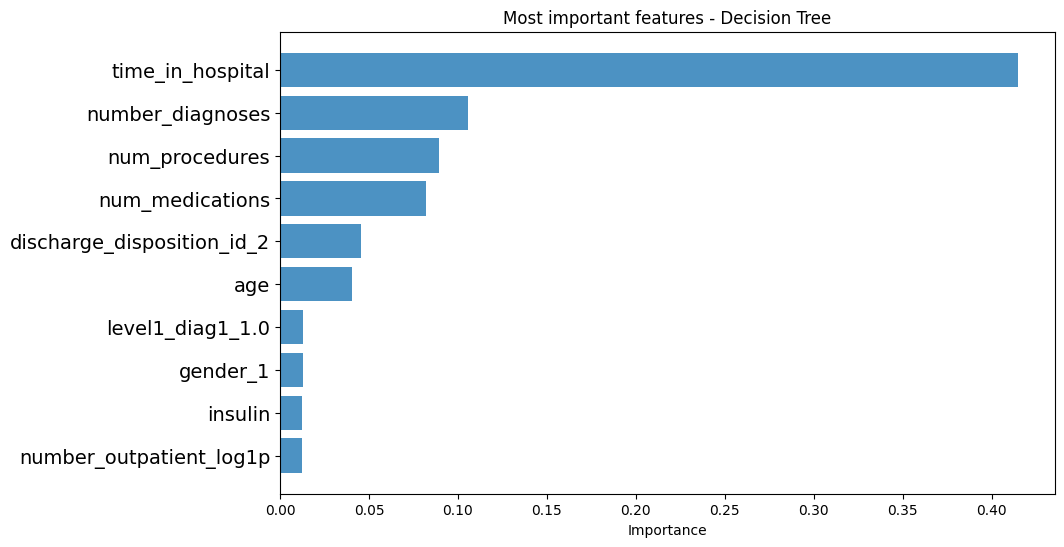

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [ ]:
import pandas as pd

# Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')
# Replace 'your_dataset.csv' with your actual file name or DataFrame

# Calculate summary statistics
summary_stats = {
    "Feature": [],
    "Mean": [],
    "Median": [],
    "Mode": []
}

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop through numerical features to calculate statistics
for column in numerical_columns:
    summary_stats["Feature"].append(column)
    summary_stats["Mean"].append(df[column].mean())
    summary_stats["Median"].append(df[column].median())
    summary_stats["Mode"].append(df[column].mode()[0])  # Mode may return multiple values, pick the first

# Convert the summary to a DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats)

# Display the summary statistics
print(summary_df)


                                Feature        Mean  Median   Mode
0                      time_in_hospital    4.415455     4.0    3.0
1                    num_lab_procedures   42.993157    44.0    1.0
2                        num_procedures    1.342036     1.0    0.0
3                       num_medications   16.080221    15.0   13.0
4                      number_diagnoses    7.500031     8.0    9.0
5                             A1Cresult    0.116614     0.0    0.0
6                             metformin    0.198650     0.0    0.0
7                           repaglinide    0.015667     0.0    0.0
8                           nateglinide    0.007082     0.0    0.0
9                        chlorpropamide    0.000850     0.0    0.0
10                          glimepiride    0.051283     0.0    0.0
11                            glipizide    0.126568     0.0    0.0
12                            glyburide    0.105582     0.0    0.0
13                          tolbutamide    0.000207     0.0   

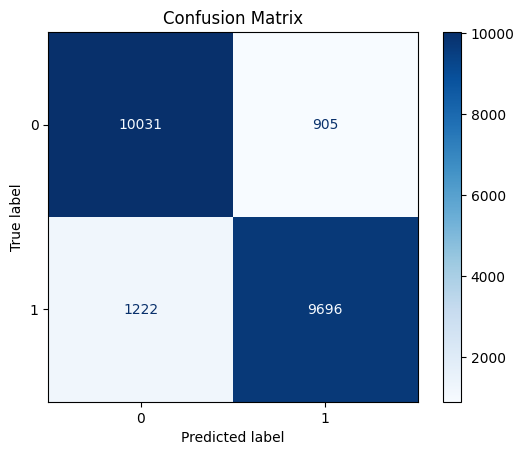

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, dtree_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtree.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


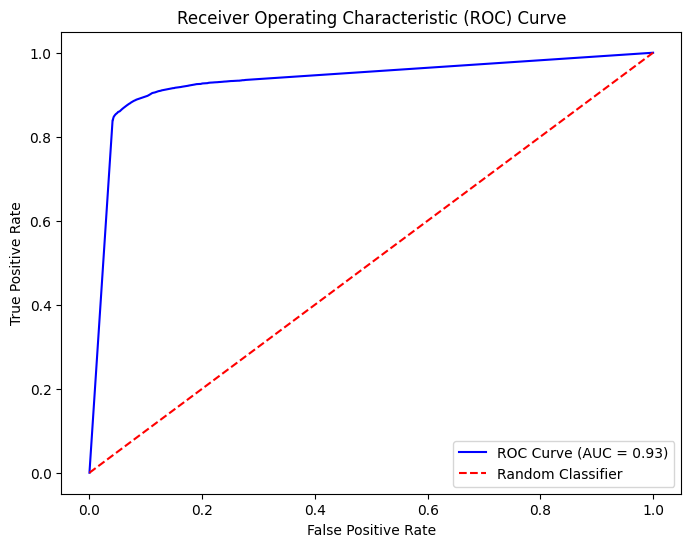

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Compute ROC curve and ROC AUC for the model
y_test_binarized = label_binarize(y_test, classes=[0, 1])  # Binarize target
dtree_pred_proba = dtree.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_binarized, dtree_pred_proba)
roc_auc = roc_auc_score(y_test_binarized, dtree_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


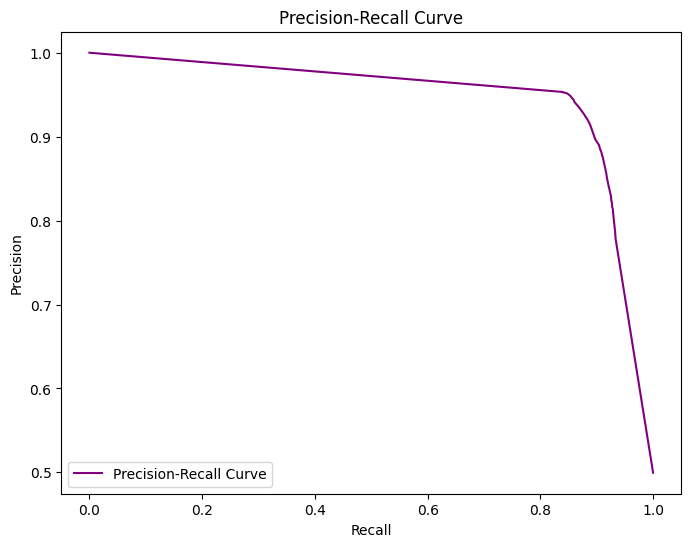

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_binarized, dtree_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()
